In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
dataset, mnist=tfds.load('mnist', as_supervised=True, with_info=True)

In [ ]:
train_dataset, test_dataset=dataset['train'], dataset['test']
class_name=['Cero','Uno','Dos','Tres','Cuatro','Cinco','Seis','Siete','Ocho','Nueve']

In [ ]:
num_train_examples=mnist.splits['train'].num_examples
num_test_examples=mnist.splits['test'].num_examples

In [ ]:
mnist

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1.incomplete5DL1EO',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }"""

In [ ]:
tfds.as_dataframe(dataset['train'].take(5), mnist)

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8


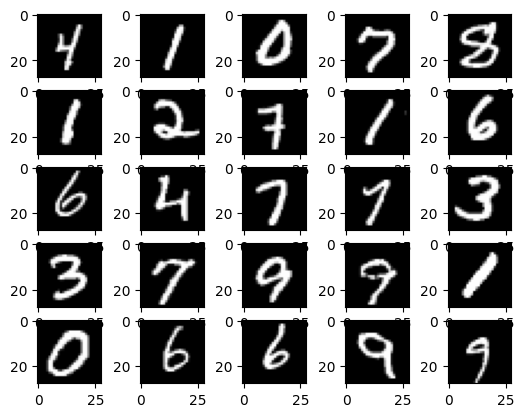

In [ ]:
import matplotlib.pyplot as plt

for i,(imagen,etiqueta)in enumerate(dataset['train'].take(25)):
  plt.subplot(5,5,i+1)
  plt.imshow(imagen, cmap='gray')

In [ ]:
def normalize(images,labels):
    images=tf.cast(images,tf.float32)
    images/=255
    return images,labels
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

In [ ]:
# Implementar la Red neuronal
start_time = time.time()
model=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)),
  tf.keras.layers.Dense(64,activation=tf.nn.relu),
  tf.keras.layers.Dense(64,activation=tf.nn.relu),
  tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
batchsize=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(batchsize)
test_dataset=test_dataset.batch(batchsize)

In [ ]:
# Entrenar el modelo
historial= model.fit(
    train_dataset, epochs=5,
    steps_per_epoch=math.ceil(num_train_examples/batchsize)
)
nn_time = time.time() - start_time

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 1.3703 - accuracy: 0.8442
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2951 - accuracy: 0.9211
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2057 - accuracy: 0.9428
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1759 - accuracy: 0.9515
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1563 - accuracy: 0.9549


In [ ]:
# Evaluar el modelo
test_loss,testRn_accuracy=model.evaluate(
    test_dataset,steps=math.ceil(num_test_examples/32)
)

313/313 [==============================] - 1s 4ms/step - loss: 0.2100 - accuracy: 0.9474


In [ ]:
print("Resutlado de prediccion: ", testRn_accuracy)
print("Tiempo de entrenamiento de la Red neuronal:", nn_time)

Resutlado de prediccion:  0.9473999738693237
Tiempo de entrenamiento de la Red neuronal: 48.36905860900879


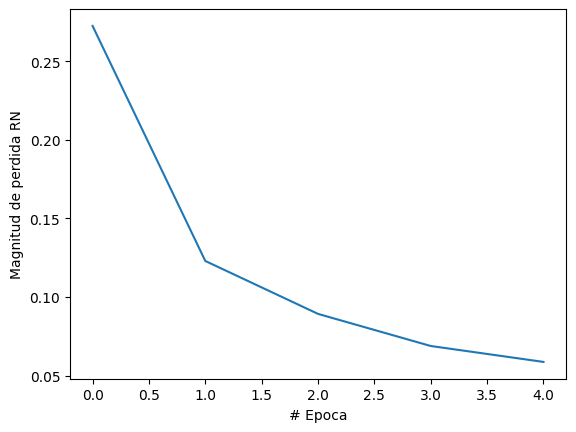

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida RN")
plt.plot(historial.history["loss"])

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

1/1 [==============================] - 0s 82ms/step


In [ ]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0],cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
      color='green'
    else:
      color='red'
    plt.xlabel("Prediccion: {}".format(class_name[predicted_label]),color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#888888")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    numrows=5
    numcols=3
    mumimages=numrows*numcols

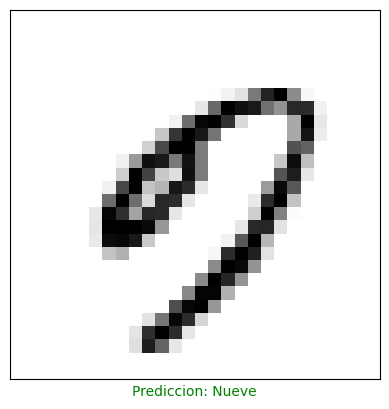

In [ ]:
plot_image(30, predictions, test_labels, test_images)

In [ ]:
# Convertir los conjuntos de datos a matrices NumPy
train_images = np.array([image.numpy() for image, label in train_dataset])
train_labels = np.array([label.numpy() for image, label in train_dataset])
test_images = np.array([image.numpy() for image, label in test_dataset])
test_labels = np.array([label.numpy() for image, label in test_dataset])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Aplanar las imágenes de entrenamiento
train_images_flat = train_images.reshape(train_images.shape[0], -1)

# Entrenar el modelo KNN
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
historial=knn.fit(train_images_flat, train_labels)
knn_time = time.time() - start_time
# Aplanar las imágenes de prueba
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Evaluar el modelo KNN
test_predictions = knn.predict(test_images_flat)
testKn_accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy: {}'.format(testKn_accuracy))
print("Tiempo de entrenamiento del clasificador KNN:", knn_time)

Accuracy: 0.9705
Tiempo de entrenamiento del clasificador KNN: 0.006459712982177734


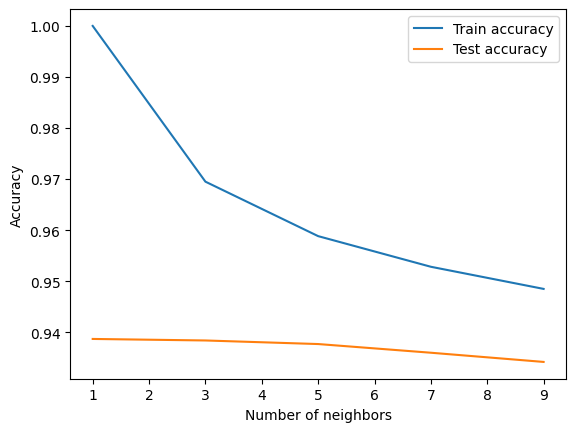

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Normalizar los datos
train_images_flat = train_images.reshape(train_images.shape[0], -1) / 255.
test_images_flat = test_images.reshape(test_images.shape[0], -1) / 255.

# Tomar una muestra aleatoria de los datos
train_images_flat_sample, _, train_labels_sample, _ = train_test_split(train_images_flat, train_labels, test_size=0.9, random_state=42)

# Probar diferentes valores de k
k_values = [1, 3, 5, 7, 9]
train_accuracies = []
test_accuracies = []
for k in k_values:
    # Entrenar el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree', n_jobs=-1)
    knn.fit(train_images_flat_sample, train_labels_sample)

    # Evaluar el modelo KNN
    train_predictions = knn.predict(train_images_flat_sample)
    train_accuracy = accuracy_score(train_labels_sample, train_predictions)
    train_accuracies.append(train_accuracy)

    test_predictions = knn.predict(test_images_flat)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    test_accuracies.append(test_accuracy)

# Graficar la precisión del modelo en los datos de entrenamiento y prueba
plt.plot(k_values, train_accuracies, label='Train accuracy')
plt.plot(k_values, test_accuracies, label='Test accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Entrenar el modelo de árbol de decisiones
start_time = time.time()
tree = DecisionTreeClassifier()
tree.fit(train_images_flat, train_labels)
dtc_time = time.time() - start_time
# Aplanar las imágenes de prueba
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Evaluar el modelo de árbol de decisiones
test_predictions = tree.predict(test_images_flat)
testAd_accuracy = accuracy_score(test_labels, test_predictions)
print('Accuracy: {}'.format(testAd_accuracy))
print("Tiempo de entrenamiento del clasificador Árbol de decisiones:", dtc_time)

Accuracy: 0.7202
Tiempo de entrenamiento del clasificador Árbol de decisiones: 16.713014841079712


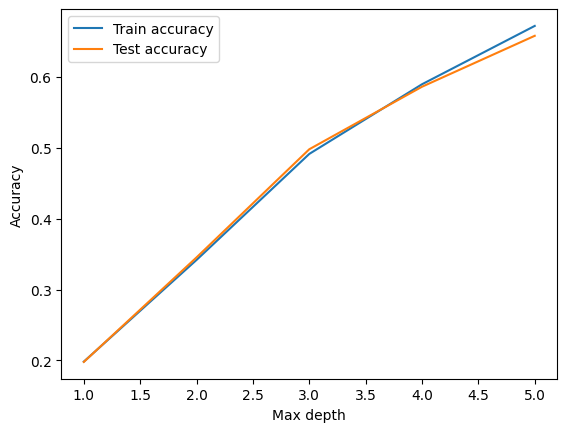

In [ ]:
# Probar diferentes valores de profundidad máxima del árbol
depth_values = [1, 2, 3, 4, 5]
train_accuracies = []
test_accuracies = []
for depth in depth_values:
    # Entrenar el modelo de árbol de decisiones
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(train_images_flat, train_labels)

    # Evaluar el modelo de árbol de decisiones
    train_predictions = tree.predict(train_images_flat)
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_accuracies.append(train_accuracy)

    test_predictions = tree.predict(test_images_flat)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    test_accuracies.append(test_accuracy)

# Graficar la precisión del modelo en los datos de entrenamiento y prueba
plt.plot(depth_values, train_accuracies, label='Train accuracy')
plt.plot(depth_values, test_accuracies, label='Test accuracy')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

Precisión del clasificador KNN: 0.9705
Precisión del clasificador Árbol de decisiones: 0.7202
Precisión de la Red neuronal: 0.9473999738693237


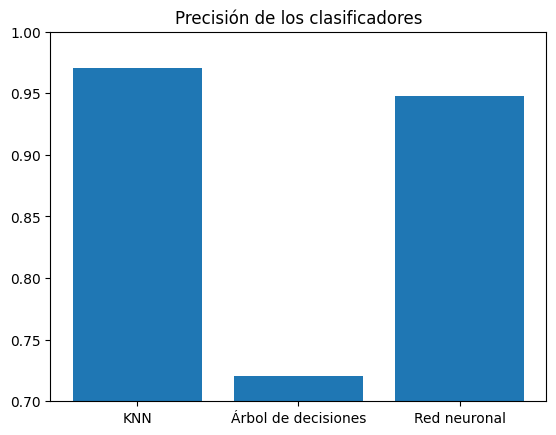

In [ ]:
# Imprimir los resultados
print("Precisión del clasificador KNN:", testKn_accuracy)
print("Precisión del clasificador Árbol de decisiones:", testAd_accuracy)
print("Precisión de la Red neuronal:", testRn_accuracy)

# Graficar los resultados
x = ['KNN', 'Árbol de decisiones', 'Red neuronal']
y = [testKn_accuracy, testAd_accuracy, testRn_accuracy]

plt.bar(x, y)
plt.ylim(0.70, 1)
plt.title('Precisión de los clasificadores')
plt.show()